##ETE ICE 472: Digital Speech & Image Processing
### Summer 2020
# Experiment 3: Gray Level Transformations


In [ ]:
# Name: Noman siddique
# Student ID: 2016-2-50-035

### Library Imports

In [ ]:
import skimage
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

## Loading the Image

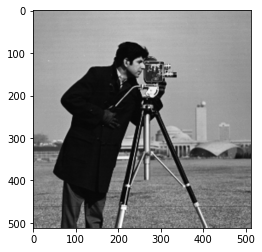

In [ ]:
img = data.camera()
img_flat = img.flatten()    # A flat version of the image is also prepared, in order to easily apply the transformation functions later.
plt.imshow(img, cmap = 'gray')
plt.show()

## Image Negatives

$ s = L - 1 - r$

In [ ]:
L = 256                     # Number of Gray Levels
neg = lambda r: L - 1 - r     # Lambda Function for the Transformation Operation

### Transformation Function:

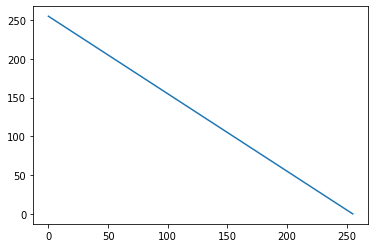

In [ ]:
r = np.arange(L)
s = [neg(x) for x in r]
plt.plot(r,s)
plt.show()

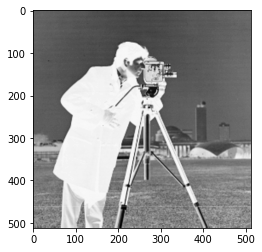

In [ ]:
neg_img = neg(img)
plt.imshow(neg_img, cmap = 'gray')
plt.show()

## Log Transformation

$ s = c*log(1 + r) $

In [ ]:
L = 256
c = (L-1)/np.log(L-1)                               # Automatically calculate the value of c from the formula
logt = lambda r: int(np.round(c * np.log(1+r)))      # Lambda Function for Log Transformation

### Transformation Function

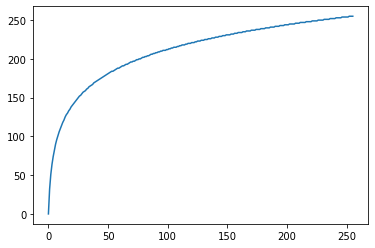

In [ ]:
r = np.arange(L)
s = [logt(x) for x in r]
plt.plot(r,s)
plt.show()

Producing the log-transformed image is done in a step/by step process: 

```[f(x) for x in img_flat]``` -> Calculates all the values of pixels individually and stores them into a list  
```np.asarray( ... list ... )``` -> Converts the list of pixels into a numpy array  
```(....).reshape(img.shape)``` -> reshape the flat numpy array to the original image shape

In [ ]:
log_img = np.asarray([logt(x) for x in img_flat]).reshape(img.shape)

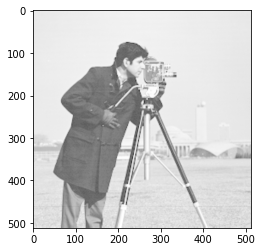

In [ ]:
plt.imshow(log_img, cmap = 'gray')
plt.show()

## Power Law Transformations

$ s = c r^\gamma $

In [ ]:
L = 256
gamma = 1/2
c = (L-1)**(1-gamma)                           # Automatically calculate the value of c
powt = lambda r: int(np.round(c*r**gamma))     # Lambda function for the power law transformation

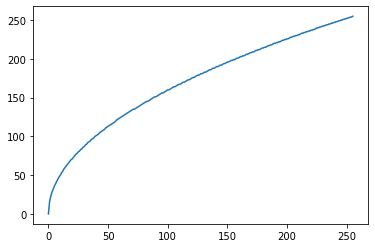

In [ ]:
r = np.arange(L)
s = [powt(x) for x in r]
plt.plot(r,s)
plt.show()

## Effect of Gamma on Transformation function

In [ ]:
gammas = [0.04, 0.10, 0.20, 0.40, 0.67, 1, 1.5, 2.5, 5, 10, 25]       # Array containing a number of gamma values

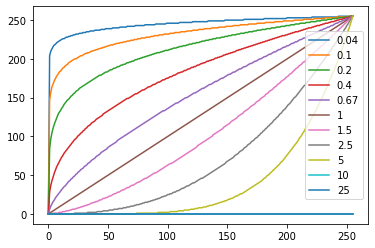

In [ ]:
# Loop over gamma values and plot their transformation functions
L = 256
r = np.arange(L)
for gamma in gammas:
  c = (L-1)**(1-gamma)
  powt = lambda r: int(np.round(c*r**gamma))
  s = [powt(x) for x in r]
  plt.plot(r,s)
  plt.legend(gammas)
plt.show()

In [ ]:
gamma = 1.5
c = 255**(1-gamma)
powt = lambda r: int(np.round(c*r**gamma))

In [ ]:
power_img = np.asarray([powt(x) for x in img_flat]).reshape(img.shape)

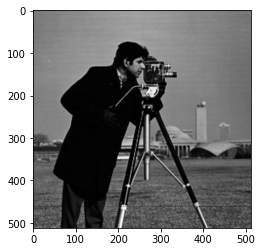

In [ ]:









plt.imshow(power_img, cmap = 'gray')
plt.show()



## Contrast Stretching

In [ ]:
(r1, s1) = (100, 20)
(r2, s2) = (150, 220)






Equation of Straight Line from (0,0) to (r1, s1):  
$ y = \frac{s1}{r1} x$  
Equation of Straight Line from (r1, s1) to (r2, s2):   
$ y = \frac {s2 - s1}{r2 - r1}(x-r1) + s1 $  
Equation of Straight Line from (r2, s2) to (255, 255):   
$ y = \frac {s2-255}{r2-255}(x-255) + 255 $ 

In [ ]:
# Function for contrast stretching
def cont_stretch(x):
  if (x <= r1):
    return s1/r1*x
  if (r1 < x <= r2):
    return (s2 - s1)/(r2 - r1)*(x - r1) + s1
  if (x > r2):
    return (s2 - 255)/(r2 - 255)*(x - 255) + 255

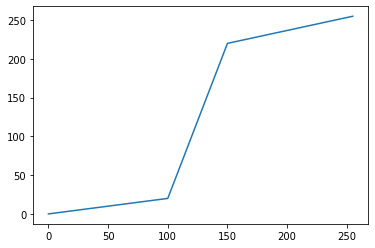

In [ ]:
r = np.arange(L)
s = [cont_stretch(x) for x in r]
plt.plot(r,s)
plt.show()

In [ ]:
cont_img = np.asarray([cont_stretch(x) for x in img_flat]).reshape(img.shape)

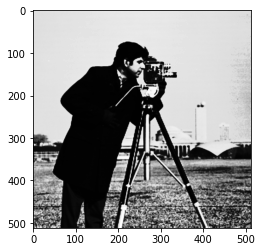

In [ ]:
plt.imshow(cont_img, cmap = 'gray')
plt.show()

## Thresholding

In [ ]:
m = 100           # Value of Threshold
def thresh(x):
  if(x < m):
    return 0
  else:
    return 255

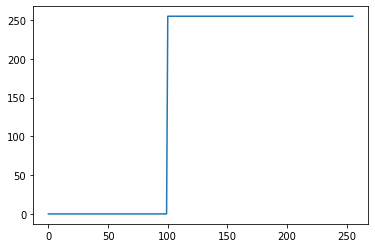

In [ ]:
r = np.arange(L)
s = [thresh(x) for x in r]
plt.plot(r,s)
plt.show()

In [ ]:
thresh_img = np.asarray([thresh(x) for x in img_flat]).reshape(img.shape)

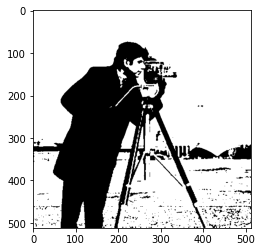

In [ ]:
plt.imshow(thresh_img, cmap = 'gray')
plt.show()

## Assignment: 

(1)  Run this notebook and produce the outputs. 

(2)  Choose a Gray Image (not color image), or input a color image as a gray image (to do this, set the **as_gray** argument to **True** while using the **imread()** function. You can either load the image by uploading it or use a link.

(a) Apply a gamma of 2.5 to obtain a new image. Then, apply gamma correction to this image to obtain the original image. Show both images. 

(b) Apply the following transformation to the original image and show the image:   

$ s = \frac {c} {1 + r + r^2} $

[Calculate the value of c by yourself, assume 256 Level quantization]

(3) Enhance the contrast of the following image: https://homepages.inf.ed.ac.uk/rbf/HIPR2/images/wom1.gif  so that the pixels in the range 100 ~ 120 are boosted in contrast. Show the input & output image. 

## Loading the image:

(256, 256)


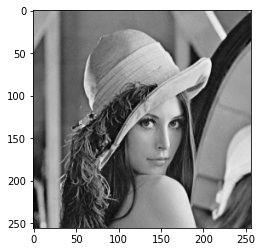

In [ ]:
from skimage import io
image=io.imread('/content/image.png')
print(image.shape)
image_flat=image.flatten()
plt.imshow(image,cmap='gray')
plt.show()

## Problem 2(a): Gamma Correction 

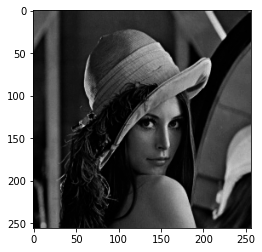

In [ ]:

gamma = 2.5
c = 255**(1-gamma)
powt = lambda r:int(np.round(c*r**gamma))
power_image  = np.asarray([powt(x) for x in image_flat]).reshape(image.shape)
plt.imshow(power_image,cmap ='gray')
plt.show()

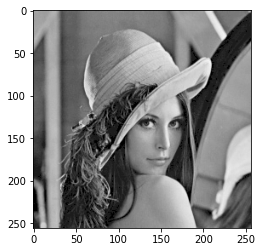

In [ ]:
gamma = 1/2.5
c = 255**(1-gamma)
powcorrect = lambda r:int(np.round(c*r**gamma))
correctimage  = np.asarray([powcorrect(x) for x in power_image.flatten()]).reshape(image.shape)
plt.imshow(correctimage,cmap ='gray')
plt.show()

## Problem 2(b): Custom Transformation

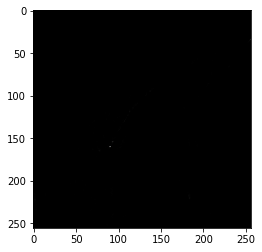

In [ ]:
L = 256
r=np.arange(L)
c = (L-1)*(1+(L-1)+(L-1)**2)
#c = (L-1)
f = lambda r:int(np.round(c/(1+r+r**2)))
#f = lambda r:int(np.round(c*r))
f_image = np.asarray([f(x) for x in image_flat]).reshape(image.shape)
plt.imshow(f_image,cmap='gray')
plt.show()

## Problem 3: Contrast Enhancement

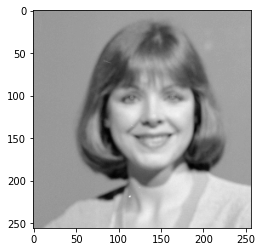

In [ ]:
new_image=io.imread('https://homepages.inf.ed.ac.uk/rbf/HIPR2/images/wom1.gif')
new_image_flat = new_image.flatten()
plt.imshow(new_image,cmap='gray')
plt.show()

In [ ]:
(r1, s1) = (100, 10)
(r2, s2) = (120, 250)

In [ ]:
# Function for contrast stretching
def cont_stretch(x):
  if (x <= r1):
    return s1/r1*x
  if (r1 < x <= r2):
    return (s2 - s1)/(r2 - r1)*(x - r1) + s1
  if (x > r2):
    return (s2 - 255)/(r2 - 255)*(x - 255) + 255

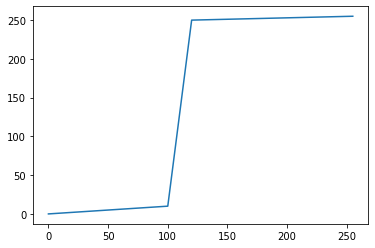

In [ ]:
r = np.arange(L)
s = [cont_stretch(x) for x in r]
plt.plot(r,s)
plt.show()

In [ ]:
cont_img = np.asarray([cont_stretch(x) for x in new_image_flat]).reshape(new_image.shape)

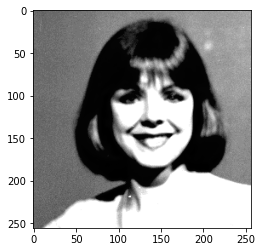

In [ ]:
plt.imshow(cont_img, cmap = 'gray')
plt.show()

## Discussion: 

In [ ]:
'''
1. here i used gray scale image, 256*256 size
2.first we load the image using some numpy and skimage library
3.complete second task gamma correction using gammma value, say gamma =2.5, when i increased gamma picture is more dark 
but when i decrease gamma picture is more white
4.then correct the gamma using 1/2.5 , and i get original image
5. when i am using custom transformation, the picture is totally dark, even not visible
6.our last task is contrast stretching , here i calculate image for r1=100 and r2=120, show more change then lab image data,
in this certain range the picture show more light then 100-150  

'''

'\n1. here i used gray scale image, 256*256 size\n2.first we load the image using some numpy and skimage library\n3.complete second task gamma correction using gammma value, say gamma =2.5, when i increased gamma picture is more dark \nbut when i decrease gamma picture is more white\n4.then correct the gamma using 1/2.5 , and i get original image\n5. when i am using custom transformation, the picture is totally dark, even not visible\n6.our last task is contrast stretching , here i calculate image for r1=100 and r2=120, show more change then lab image data,\nin this certain range the picture show more light then 100-150  \n\n'